<a href="https://colab.research.google.com/github/MarvelousAlex/Python_Data_Analysis/blob/main/28_Matplotlib_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Intro

## Overview

### Notes
* Matplotlib is a library for creating static, interactive, and animated visualizations in Python.
* Some of the major plot types available in Matplotlib are line, bar, scatter, histogram, and pie charts, along with many others.
* It's highly customizable and can be used to create complex plots by layering elements.

### Importance

* Matplotlib is crucial for data analysis, it offers a way to visualize data and insights in a graphical format.
* It facilitates the understanding of data through visual representation, making it easier to detect patterns, trends, and outliers.
* Supports a wide range of graphs and plots including visualizations like 3D plots and interactive graphs for in-depth analysis.
* Integrates with Pandas and NumPy, easy to go from data manipulation to visualization.

### Import

* To use Matplotlib, you first need to import it, usually alongside Pyplot, which is a plotting module.
* The import convention is to import `matplotlib.pyplot` as `plt`, simplifying the reference to the module while coding.

You can view the official documentation on the charts [here](https://matplotlib.org/stable/plot_types/index.html).

## Loading Data

### Notes

* Let's load in the data from the CSV using `pd.read_csv()`.

### Example

Let's load in our file. Don't forget to load and install (only in Google Collab do you have to install every time) the `datasets` library every time you open a new session.

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

### Plotting a simple line plot

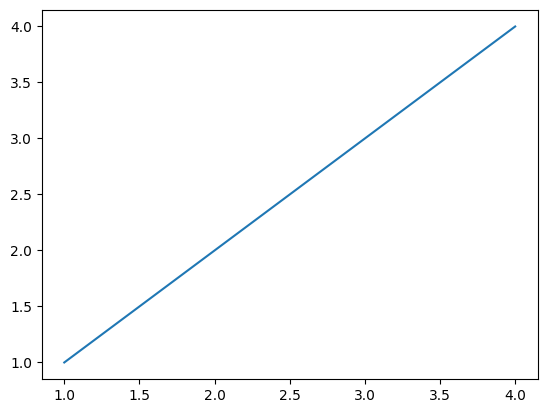

In [2]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x,y)

We can remove that:
> [<matplotlib.lines.Line2D at 0x1a035b6d0>]  

By adding `plt.show()` although it's not required in Jupyter Notebooks.

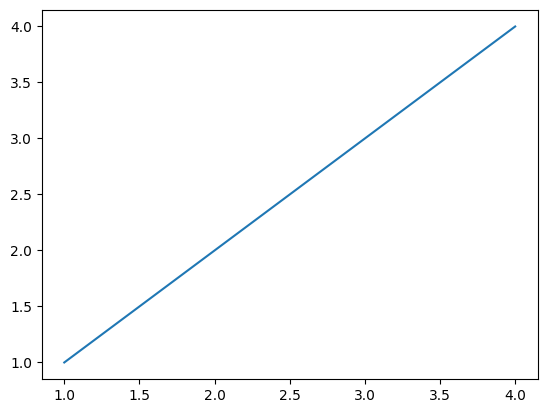

In [3]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)
plt.show()

## Line Graphs

### Notes

* `plot()` is used to draw points in a diagram.
* The default draws a line from point to point.
* It takes parameters for specifying points in the graph.
  * First parameter is the *x-axis*.
  * Second parameter is the *y-axis*.
  * Like this: `plt.plot(x-axis,y-axis)`.
* Used to display information as a series of data points called 'markers' connected by straight line segments.
* Ideal for showing trends over time or continuous data.

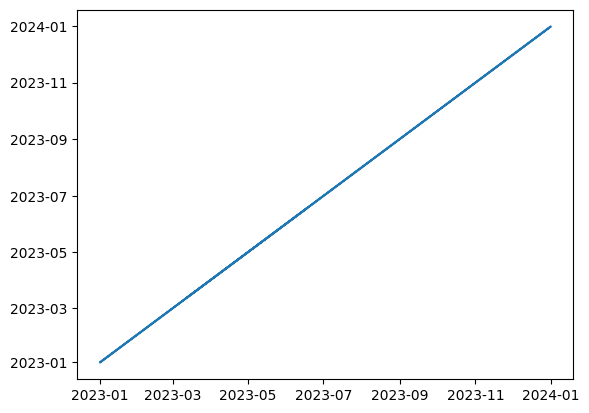

In [4]:
plt.plot(df.job_posted_date, df.job_posted_date)
plt.show()

Alternatively, we can compress what we have written:

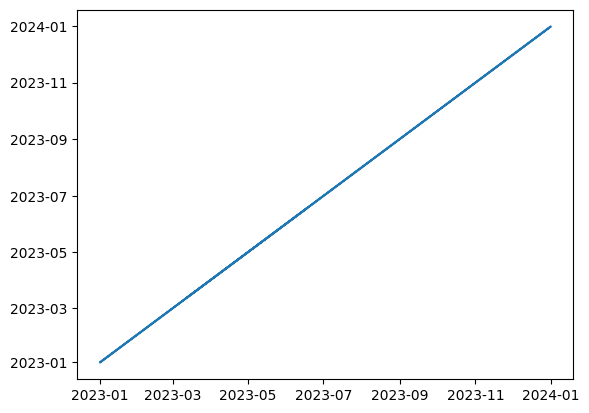

In [5]:
plt.plot(df.job_posted_date, df.job_posted_date, data=df)
plt.show()

But we want the counts of job over time.

What happens if we just aggregated by `job_posted_date`?

In [6]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

date_counts

,count
job_posted_date,
2023-01-01 00:00:04,1
2023-01-01 00:00:07,1
2023-01-01 00:00:22,1
2023-01-01 00:00:24,1
2023-01-01 00:00:27,1
...,...
2023-12-31 23:40:18,2
2023-12-31 23:40:22,2
2023-12-31 23:40:31,2


### NOTE - `Series`

This `date_counts` is a `Series` object and NOT a `DataFrame`, it behaves differently then a DataFrame.

We can access the values of a `Series` object by passing the whole `Series` or specifying `Series.values`

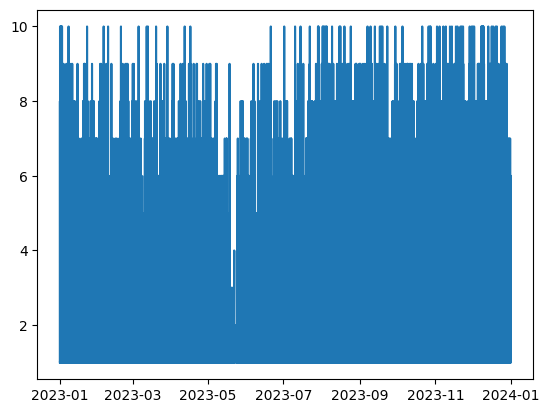

In [7]:
plt.plot(date_counts.index, date_counts)
plt.show()

Here we specify `Series.values`, it's a 1-D array effectively so either will work.

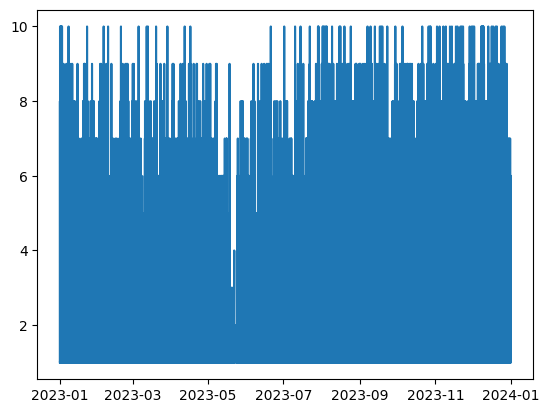

In [8]:
plt.plot(date_counts.index, date_counts.values)
plt.show()

This is a hot mess....

We need to extract the month using the attribute `dt` accessor and the attribute of `.month` from the `job_posted_date`.

In [9]:
# Assuming 'job_posted_date' is already converted to datetime format in the original df
df.job_posted_month = df.job_posted_date.dt.month

# Group by 'month' and count the job postings
monthly_counts = df.job_posted_month.value_counts()

# Sort the months
monthly_counts = monthly_counts.sort_index()

monthly_counts

/tmp/ipython-input-3994191866.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.job_posted_month = df.job_posted_date.dt.month


,count
job_posted_date,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


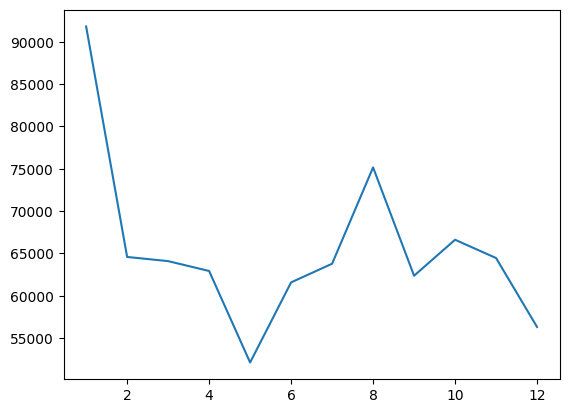

In [10]:
plt.plot(monthly_counts.index, monthly_counts)

## Series vs DataFrames in Pandas

A Series is one of the core data structures in pandas, akin to a one-dimensional array (like in NumPy) BUT with powerful, flexible indexing capabilities.

#### Core Characteristics
- One-Dimensional: It's essentially a single column of data.
- Indexed: Each element in a Series has an associated label, known as the index. The index can be numbers, dates, or even strings.
- Diverse Data Types: A Series can hold any data type—integers, strings, floats, Python objects, etc. However, all elements within a Series must be of the same data type.